In [4]:
# importing all necessary libraries to run the code
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk import NaiveBayesClassifier
from sklearn.model_selection import train_test_split
from nltk.stem import PorterStemmer
import re
# using the variable sw to hold all stopwords that are in English

# reading csv file with the data for analyse
ds = pd.read_csv('/deforestation_sentiment_train.csv')
sw = ds['text']

<function matplotlib.pyplot.show(close=None, block=None)>

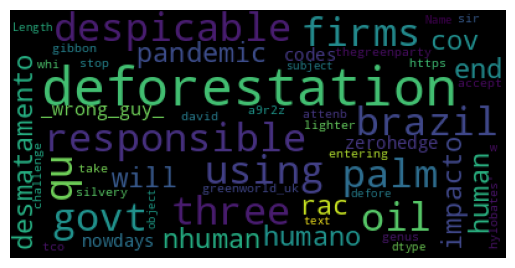

In [5]:
from wordcloud import WordCloud, STOPWORDS
wordcloud = WordCloud().generate(str(sw))
plt.imshow(wordcloud)
plt.axis("off")
plt.show

In [6]:
# checking to see how the data are formatted
ds.head()

,Unnamed: 0,id,text,user_name,user_description,user_location,user_following,user_followers,tweets_by_user,user_created_at,tweet_created,retweets,likes,hashtags,media,search_term,emojis,sentiments_list,revised_sentiment,distillbert_valence
0,253291,1359216214875262980,three palm oil firms were responsible for a qu...,hoteldealphuket,Phuket Hotel Deals offers Phuket property for ...,Phuket,53,288,63131,2013-10-23 01:50:59,2021-02-09 19:02:53,0,0,"[{'text': 'animal_rehabilitation', 'indices': ...",http://pbs.twimg.com/media/Etzn8WuXIAAZ2ju.jpg,deforestation -filter:retweets,NaN,NaN,negative,-0.992038
1,253283,1359691122985947137,despicable #brazil govt using #pandemic as cov...,PhelimKine,Senior Director Asia @StandMighty @TeamWaxman;...,Asia Pacific,1326,19024,53843,2011-09-16 07:06:02,2021-02-11 02:30:00,0,2,"[{'text': 'Brazil', 'indices': [12, 19]}, {'te...",http://pbs.twimg.com/media/Et4nD6zXMAMTg2V.jpg,deforestation -filter:retweets,NaN,NaN,negative,-0.997723
2,253280,1359697180987183105,🌳🍂🌳impacto humano no #desmatamento / \nhuman i...,isis_0726,☮⏳🌍🌎🌏O erro da ética tem sido a crença de que ...,NaN,115,31,3724,2019-10-27 21:15:12,2021-02-11 02:54:04,0,0,"[{'text': 'desmatamento', 'indices': [21, 34]}...",http://pbs.twimg.com/media/Et6dYS4WQAAoNul.jpg,deforestation -filter:retweets,"{'🌳', '❌', '🍂'}",{'neutral'},negative,-0.973575
3,253268,1359718063994667009,deforestation will be the end of the human rac...,AmanzWillieONE,"Sincerity, Awards winner, Crusading Climate an...",Africa.,889,627,3357,2018-11-11 03:14:22,2021-02-11 04:17:03,1,2,[],http://pbs.twimg.com/media/Et6wX0HUYAUrGlg.jpg,deforestation -filter:retweets,NaN,NaN,negative,-0.963673
4,253260,1359734007731269632,@_wrong_guy_ @zerohedge no other codes nowdays...,GordonGecko3,Gold/Silver/Oil/Uranium-Bug\nhttps://t.co/AZNz...,Worldwide,896,242,9518,2011-08-13 20:41:04,2021-02-11 05:20:24,0,1,[],http://pbs.twimg.com/tweet_video_thumb/Et6-3nx...,deforestation -filter:retweets,{'😉'},{'positive'},negative,-0.995930


In [7]:
# the method info of a dataframe shows us the number of null coluns of our data
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 939 entries, 0 to 938
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           939 non-null    int64  
 1   id                   939 non-null    int64  
 2   text                 939 non-null    object 
 3   user_name            939 non-null    object 
 4   user_description     900 non-null    object 
 5   user_location        758 non-null    object 
 6   user_following       939 non-null    int64  
 7   user_followers       939 non-null    int64  
 8   tweets_by_user       939 non-null    int64  
 9   user_created_at      939 non-null    object 
 10  tweet_created        939 non-null    object 
 11  retweets             939 non-null    int64  
 12  likes                939 non-null    int64  
 13  hashtags             939 non-null    object 
 14  media                939 non-null    object 
 15  search_term          939 non-null    obj

In [8]:
# Dropping all Na columns
ds.dropna(axis=0, inplace=True)

In [9]:
def cleaning_data(data):
    aux_list = []
    flag = False
    for phase_word in data:
        word_list = []
        for word in phase_word.split():
            word = word.lower()
            if flag and not word in sw:
                flag = False
                word_list.append('not_'+word)
                continue
            if re.search('(n\'t)$|(not)|(no)|(never)', word):
                flag = True
                continue
            if not word in sw:
                word = re.sub('[\W_0-9]', ' ', word)
                word_list.append(word)
        aux_list.append(' '.join(word_list))
    return aux_list

In [10]:
X = cleaning_data(ds['sentiments_list'])
y = ds['revised_sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
# This CountVectorizer is used to represent the words as a list of values, instead of text
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

vectorizer.fit(X)
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(y)
y_train = le.transform(y_train)
y_test = le.transform(y_test)

Epoch 1/15
4/4 [==============================] - 1s 5ms/step - loss: 1.1630 - accuracy: 0.2422
Epoch 2/15
4/4 [==============================] - 0s 4ms/step - loss: 1.1514 - accuracy: 0.2422
Epoch 3/15
4/4 [==============================] - 0s 4ms/step - loss: 1.1397 - accuracy: 0.2422
Epoch 4/15
4/4 [==============================] - 0s 7ms/step - loss: 1.1284 - accuracy: 0.2422
Epoch 5/15
4/4 [==============================] - 0s 5ms/step - loss: 1.1170 - accuracy: 0.2422
Epoch 6/15
4/4 [==============================] - 0s 4ms/step - loss: 1.1056 - accuracy: 0.2422
Epoch 7/15
4/4 [==============================] - 0s 4ms/step - loss: 1.0944 - accuracy: 0.2422
Epoch 8/15
4/4 [==============================] - 0s 5ms/step - loss: 1.0832 - accuracy: 0.2422
Epoch 9/15
4/4 [==============================] - 0s 5ms/step - loss: 1.0723 - accuracy: 0.2422
Epoch 10/15
4/4 [==============================] - 0s 4ms/step - loss: 1.0613 - accuracy: 0.2422
Epoch 11/15
4/4 [======================

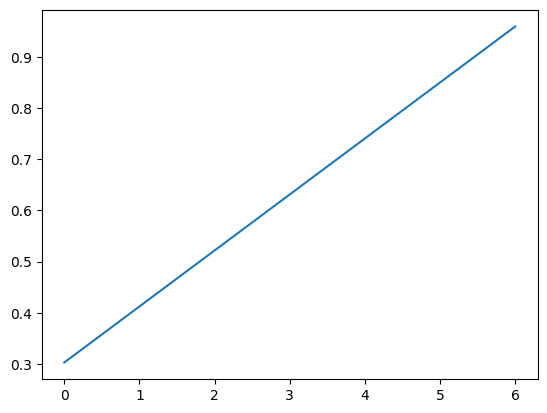

In [12]:
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt

model = Sequential()
model.add(Dense(units=3, activation='sigmoid'))
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
##Epochs can be changed to give greater accrucy
history = model.fit(X_train, y_train, epochs=15, verbose=1)
scores = model.evaluate(X_test, y_test, verbose=1)
print("Accuracy:", scores[1])
scores.reverse
ypoints = np.array(scores)
xpoints = np.array([6,0])
plt.plot(xpoints, ypoints)
plt.show()

